In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

from bio_grns import (
    Trajectory,
    GRNSimulator
)

from bio_grns.plotting import (
    activity_heatmap,
    expression_heatmap,
    latent_heatmap,
    plot_gene_summary
)

In [2]:
### Construct a trajectory ###

trajectory_1 = Trajectory(
    25,                             ### Length of trajectory in time units (minutes)
    primary_trajectory = True,      ### Trajectory is primary (represents wall clock)
    offset_expression_activity=3,
    force_positive = True,          ### Return absolute value of activity
    latent_network_sparsity = 1,    ### Ratio of TFs which will be influenced by this trajectory
    name = "Development"            ### Name this trajectory
)


### Random walk starting with an activity of 0 and
trajectory_1.add_pattern(
    'random', 0.75, 0.01, 0.05
) 

### Cycle from zero to one (halfway through the trajectory)
### to zero again withmrandom step sizes between 0.01 and 0.5
trajectory_1.add_pattern(
    'cyclic', 0, 0.1, 0.5
)

### Cycle from .8 to 1 (20% into the trajectory) to 0 with
### random step sizes between 0.01 and 0.5
trajectory_1.add_pattern(
    'updown', .8, .2, (0.1, 0.5)
)

### Monotonic increasing walk starting with an activity of 0 and
### steps between 0.001 and 0.005
trajectory_1.add_pattern(
    'monotonic', 0, 0.01, 0.075
) 

In [3]:
### Create a simulator ###

sim = GRNSimulator(
    200,                         ### Number of genes
    20,                          ### Number of genes which are regulators
    212,                         ### Random number for seeding generator
    n_samples = 2000,            ### Number of samples to generate
    counts_per_sample = 5000,    ### Number of read counts per sample
    debug=True
)

sim.add_trajectory(trajectory_1)   ### Add the trajectory to the simulator
sim.set_biophysical_parameters(
    halflife_limits = (5, 60)    ### Set boundries for halflife (to calculate decay constant)
)
sim.set_network_parameters(
    regulatory_network_sparsity = 0.15,       ### Set the sparsity in the target -> regulator network
    regulatory_network_activator_ratio = 0.8  ### Set the ratio of positive target -> regulator network edges
)

sim.simulate()

2023-07-10 13:51:58,471 Generating trajectory -> regulator networks
2023-07-10 13:51:58,474 Generated (20, 4) network with 20 nonzero edges
2023-07-10 13:51:58,475 Generated network for Development
2023-07-10 13:51:58,475 Simulating gene biophysical parameters
2023-07-10 13:51:58,476 Simulating regulatory network
2023-07-10 13:51:58,478 Generated (200, 20) network with 593 nonzero edges
2023-07-10 13:51:58,478 Simulating gene expression over time
2023-07-10 13:51:58,479 Generating pattern gene expression for Development
2023-07-10 13:51:58,479 Generating pattern regulatory activity for Development
2023-07-10 13:51:58,479 Generating pattern dynamic states for Development
2023-07-10 13:51:58,483 Generating dynamic expression (25 x 200) with activation function relu_onemax


<Axes: title={'center': 'Trajectory 0 Expression'}, xlabel='Time', ylabel='Genes'>

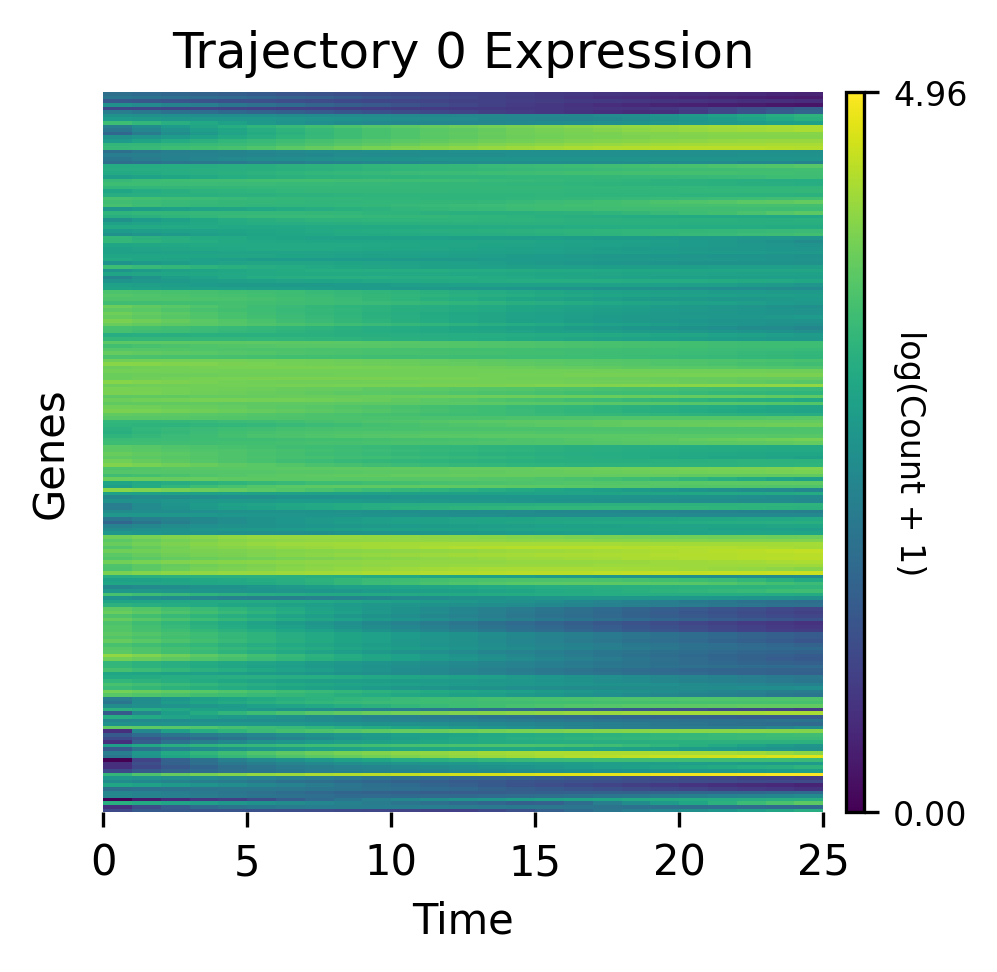

In [4]:
expression_heatmap(sim, log=True)

<Axes: title={'center': 'Trajectory 0 Activity'}, xlabel='Time', ylabel='TFs'>

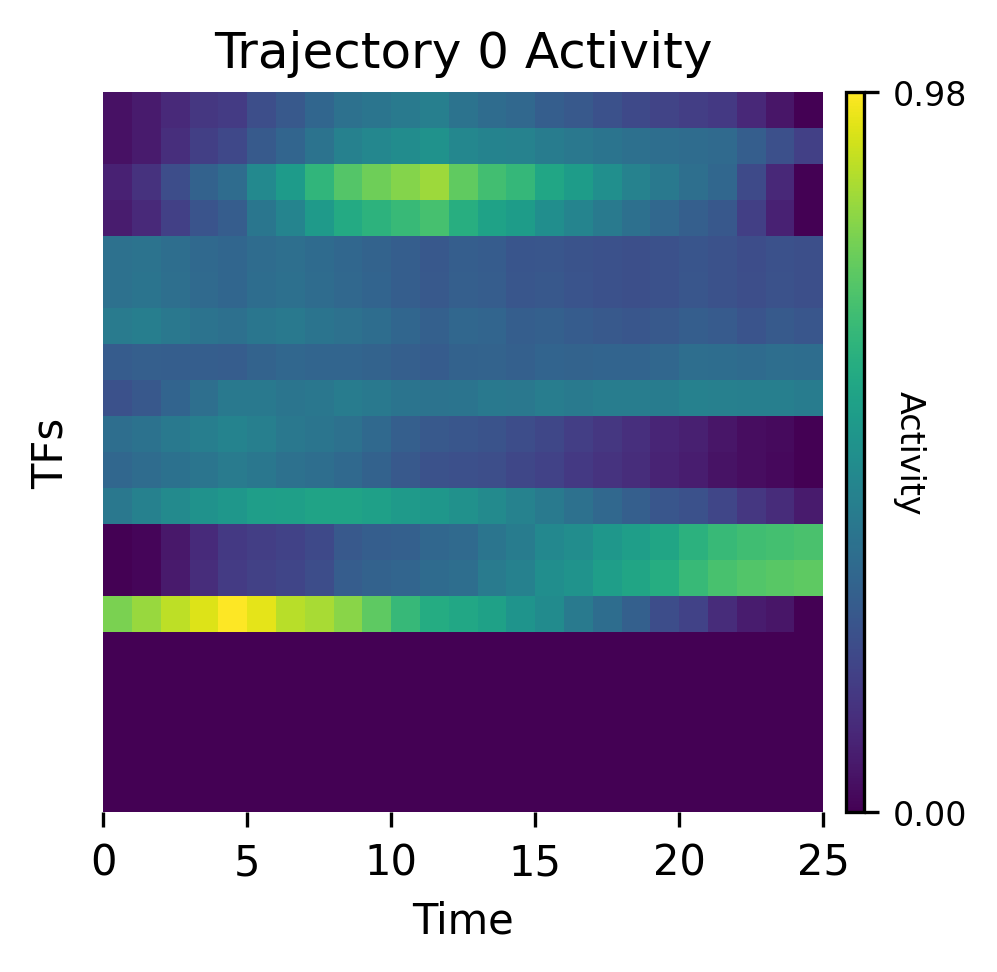

In [5]:
activity_heatmap(sim)

<Axes: title={'center': 'Trajectory 0 Latent Pattern'}, xlabel='Time'>

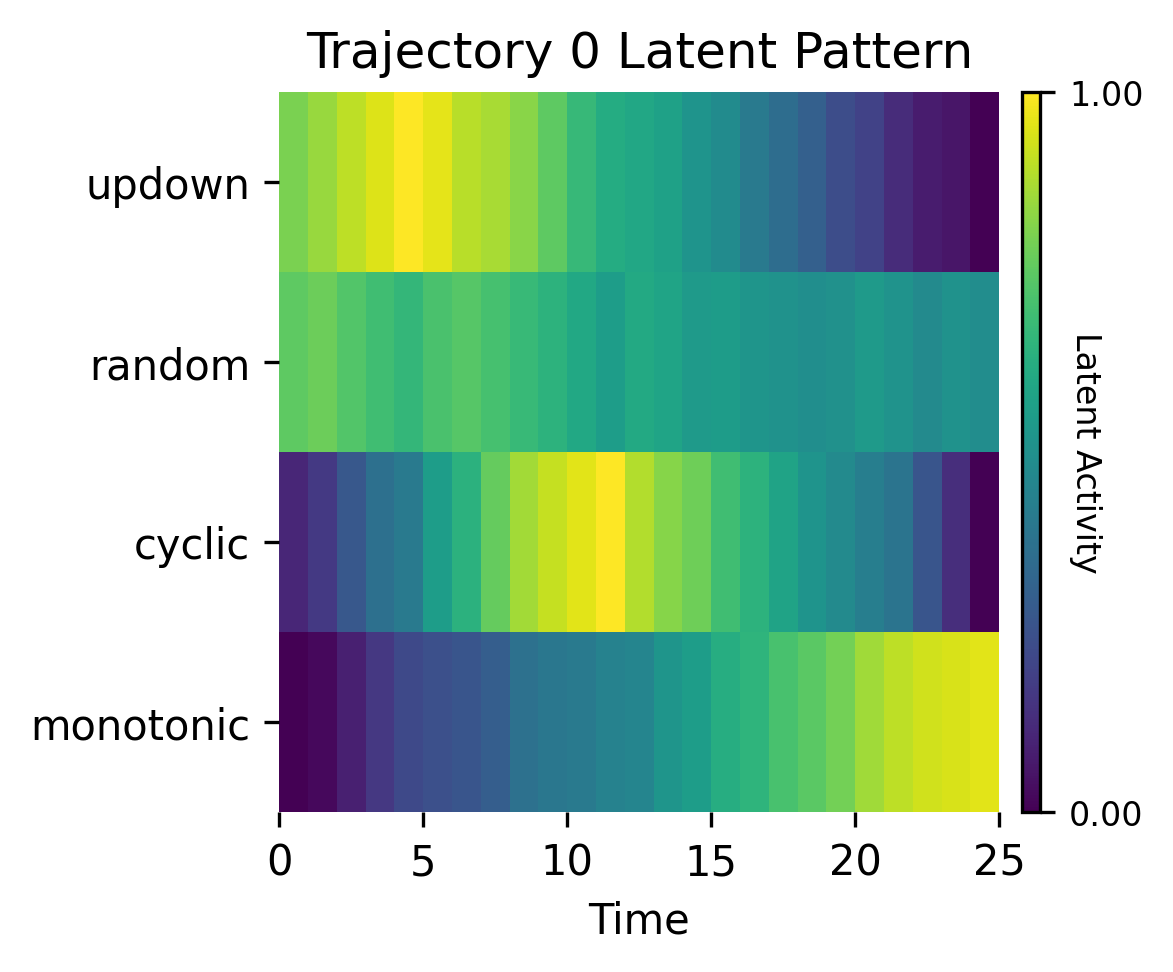

In [6]:
latent_heatmap(sim)

In [7]:
adata = sim.generate_count_data()

2023-07-10 13:51:58,989 Simulating count data from trajectories
100%|██████████| 2000/2000 [00:00<00:00, 2920.41it/s]


/home/chris/.local/anaconda3/envs/inferelator/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/chris/.local/anaconda3/envs/inferelator/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/chris/.local/anaconda3/envs/inferelator/lib/

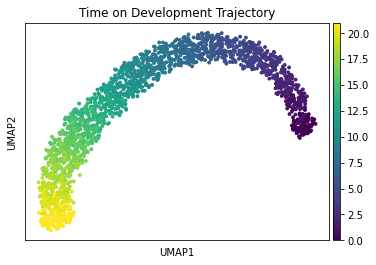

In [8]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="Development", title="Time on Development Trajectory")

In [9]:
adata.write("200g_20tf_1k_single_trajectory_connected.h5ad")

array([[<AxesSubplot: title={'center': 'Counts'}>,
        <AxesSubplot: title={'center': 'Velocity'}>],
       [<AxesSubplot: title={'center': 'Transcription'}>,
        <AxesSubplot: title={'center': 'Decay'}>]], dtype=object)

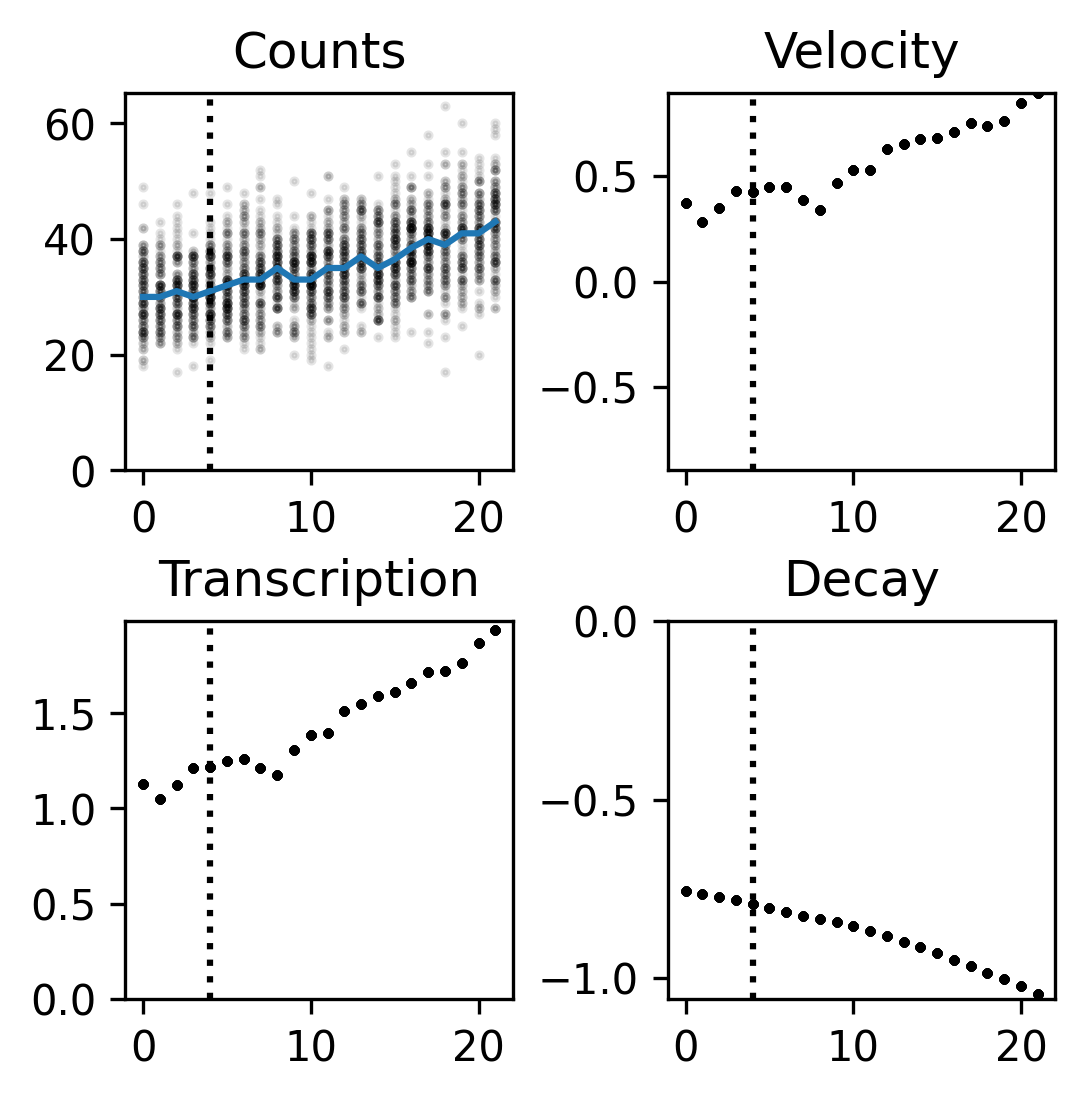

In [10]:
plot_gene_summary(
    adata,
    108,
    "Development"
)

array([[<AxesSubplot: title={'center': 'Counts'}>,
        <AxesSubplot: title={'center': 'Velocity'}>],
       [<AxesSubplot: title={'center': 'Transcription'}>,
        <AxesSubplot: title={'center': 'Decay'}>]], dtype=object)

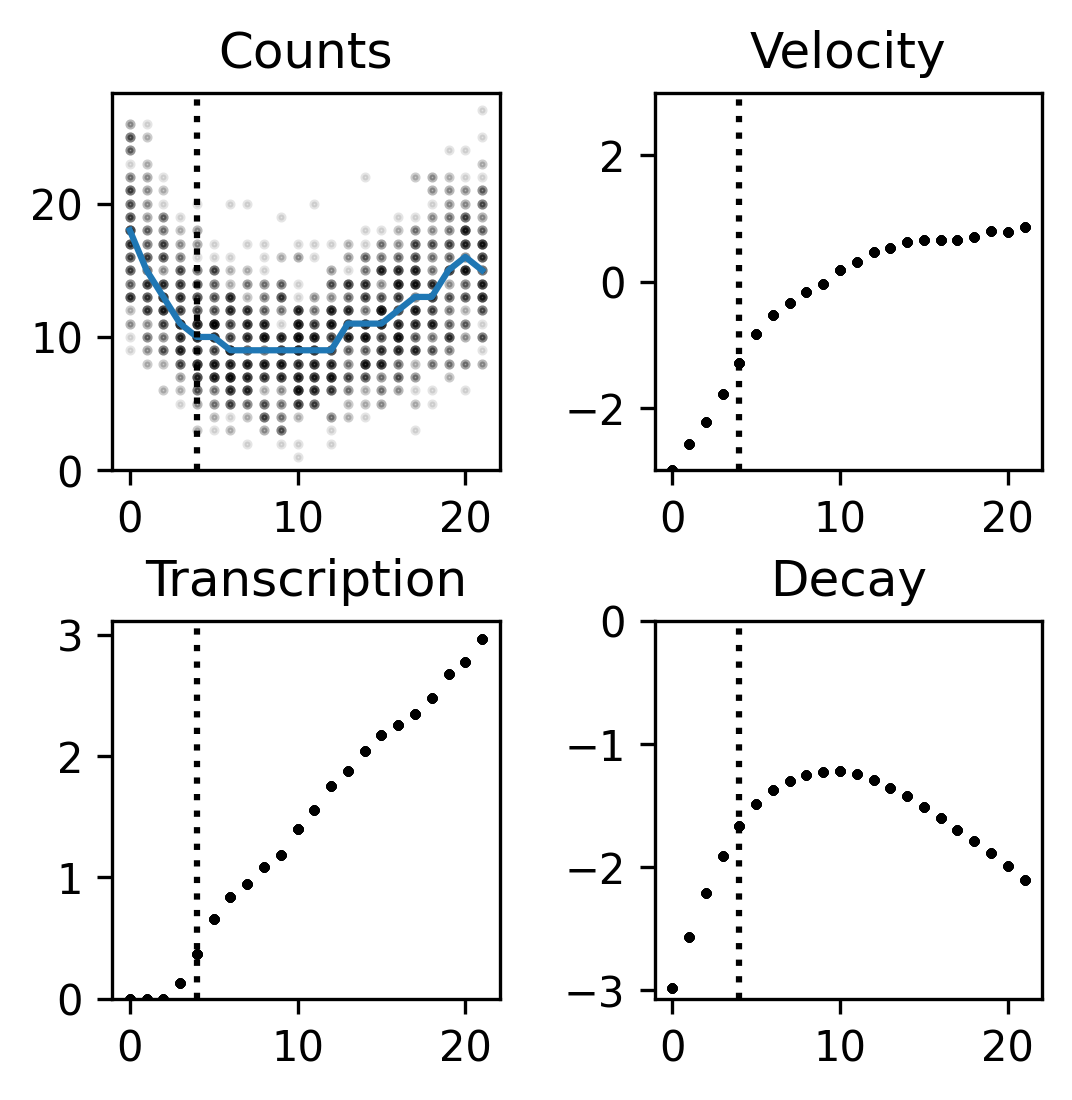

In [11]:
plot_gene_summary(
    adata,
    21,
    "Development"
)